# Project: Investigate a Dataset - [No-show-appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
    My dataset collects information from 100k medical appointments in Brazil and is focused on the question of 
    whether or not patients show up for their appointment. A number of characteristics about the patient are included in each       row 
    ‘ScheduledDay’ tells us on what day the patient set up their appointment.
    ‘Neighborhood’ indicates the location of the hospital.
    ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, 
    and ‘Yes’ if they did not show up.
    
### Question(s) for Analysis
    1.	Which category goes to the doctor more, is it Men or women?
    2.	Who is more punctual, men or women?
    3.	what is the most frequent age go to the doctor?
    4.	What is the age group most affected by diabetes?
    5.	Range of schedule Day timestamp
    6.	Range of Appointment Day timestamp 
    7.the most visited Neighbourhood
    

 <a id='Data Wrangling'></a>
## Data Wrangling

In [2]:
# importing packages
from pandas import *
# loading Data
df=read_csv('E:\GetHub\EDA-for-Medical-Appointment\medical-appointments.csv')

# lets see first 5 rows

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# lets explore column’s Data type

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

# lets see the dimensions of the data fram

In [5]:
print("data fram has dimension row X columns ",df.shape)

data fram has dimension row X columns  (110527, 14)


# check for missing values in each column

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# check for duplicates rows

In [7]:
df.duplicated().sum()

0

# check if there is age<=0

In [8]:
(df['Age']<=0).any()

True

# Data cleaning

# convert ScheduledDay and AppointmentDay data type to date time

In [9]:
def convert(ColName):
    return to_datetime(df[ColName])

df['ScheduledDay']=convert('ScheduledDay')
df['AppointmentDay']=convert('AppointmentDay')


# check for updates

In [10]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

# Drop rows with age=0 as there is no person whose age=0

In [16]:
df.drop(df.index[df['Age']<=0],inplace=True)

False

# check for updates

In [11]:
(df['Age']<=0).any()

True

# Exploratory Data Analysis (EDA)

# Descriptive statistics for each column

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Describtion of non numerical columns

In [14]:
df.describe(include='O')

,Gender,Neighbourhood,No-show
count,110527,110527,110527
unique,2,81,2
top,F,JARDIM CAMBURI,No
freq,71840,7717,88208


# some visualizations

In [15]:
 import matplotlib.pyplot as plt
import numpy as np

# Which category goes to the doctor more, is it Men or women?

Text(0.5, 1.0, 'ratio between woman and men')

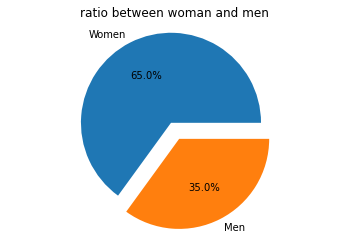

In [16]:
NumberOfWoman=(df['Gender']=='F').sum()
NumberOfMen=(df['Gender']=='M').sum()
plt.pie([NumberOfWoman,NumberOfMen],labels=['Women','Men'],autopct ='%1.1f%%',explode=[0.1,0.1])
plt.axis('equal')
plt.title("ratio between woman and men")

# Who is more punctual, men or women? 

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: Gender, dtype: int64


Text(0.5, 1.0, 'ratio between woman and men')

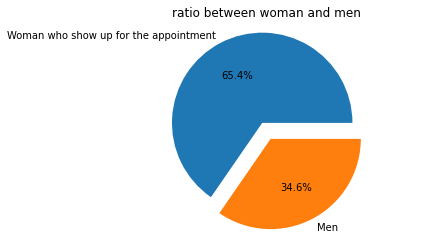

In [17]:

x=df.groupby(['Gender','No-show'])['Gender'].count()
print(x)
# visualizing the result 
plt.pie([x[1],x[3]],labels=['Woman who show up for the appointment','Men'],autopct ='%1.1f%%',explode=[0.1,0.1])
plt.axis('equal')
plt.title("ratio between woman and men")

# what is the most frequent age?

the most frequent age is :  0


Text(0.5, 1.0, 'Histogram shows the most frequent age go to the doctor')

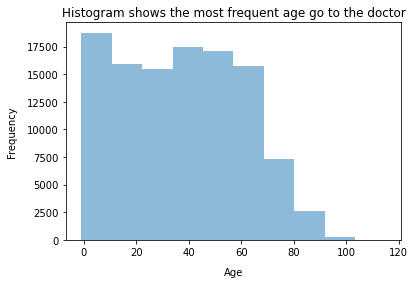

In [18]:
print('the most frequent age is : ',df['Age'].mode()[0])   
plt.hist(df['Age'],label='Age',alpha=0.5)  
plt.xlabel("Age",labelpad=10)
plt.ylabel("Frequency",labelpad=10)
plt.title("Histogram shows the most frequent age go to the doctor")

# What is the age group most affected by diabetes?

In [19]:
df.groupby(['Diabetes','Age'])['Diabetes'].count()

Diabetes  Age
0         -1        1
           0     3539
           1     2272
           2     1617
           3     1513
                 ... 
1          95       4
           96       2
           97       1
           98       2
           99       1
Name: Diabetes, Length: 195, dtype: int64

In [20]:
print('The schedule Day begin from {} and end in {}'.format(df['ScheduledDay'].min(),df['ScheduledDay'].max()))

The schedule Day begin from 2015-11-10 07:13:56+00:00 and end in 2016-06-08 20:07:23+00:00


In [21]:
print('The Appointment Day begin from {} and end in {}'.format(df['AppointmentDay'].min(),df['AppointmentDay'].max()))


The Appointment Day begin from 2016-04-29 00:00:00+00:00 and end in 2016-06-08 00:00:00+00:00


# scatter plot explain the most visited Neighbourhood

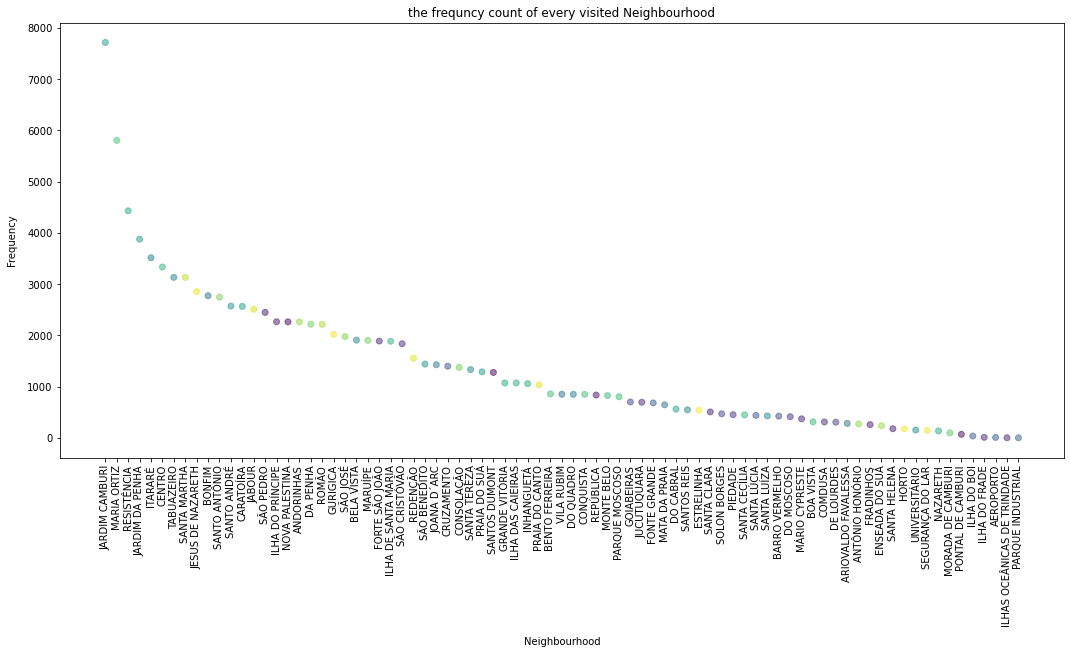

In [23]:
data=(df['Neighbourhood'].value_counts())
x=data.keys()
y=data.values
rng = np.random.RandomState(0) 
colors= rng.rand(len(y))
plt.figure(figsize=(18, 8))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.xlabel("Neighbourhood",labelpad=10)
plt.ylabel("Frequency",labelpad=10)
plt.xticks(rotation = 90)
plt.title("the frequncy count of every visited Neighbourhood")
plt.show()


<a id='conclusions'></a>
## Conclusions
In my analysis I found that there is no null data or duplicated data or missing data but I found that there is age 
which is less than 1 year so I dropped rows with age less than or equal to zero
Also I found that the most category goes to the doctor is woman
More ever the most category that show up for their appointment is also woman

### Limitations
.The most frequent age go to the doctor is 1 year

.Also the age group most affected by diabetes is between 95:99 year